In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1- Generate continuous random dataset for the problem of X = study hours and Y = grade of students (if you study more, you will get a higher grade).

In [12]:
X=np.random.normal(4,1,200)
Y=np.random.normal(1,0.1,200)*X
# X,Y

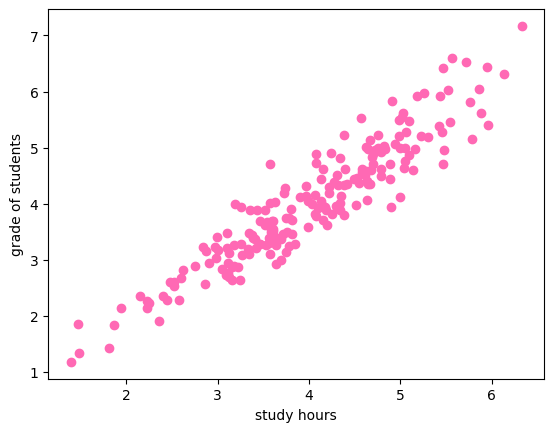

In [13]:
plt.scatter(X,Y,c="hotpink")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.show()

2- Split your dataset to train and test with train_test_split function.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, shuffle=True)
X_train, Y_train,X_test,Y_test

(array([4.67760728, 5.96453101, 2.40684563, 3.7519952 , 2.86405057,
        3.12608436, 5.78116632, 3.08699394, 4.58398217, 1.81353791,
        3.27196402, 3.12742065, 4.22112651, 3.96497485, 3.5986531 ,
        4.07676782, 3.19334759, 2.52567288, 5.02901259, 4.82452331,
        3.89824634, 5.15754797, 4.30549722, 4.26999785, 5.5606351 ,
        2.74690908, 5.05599804, 2.98459482, 3.17522063, 4.75865268,
        1.94451251, 3.22227035, 5.94985601, 4.19424764, 4.34468937,
        4.69042471, 5.47584402, 3.59730277, 4.17329545, 4.14822036,
        4.60913091, 4.54644912, 3.85148888, 4.62704169, 4.07668575,
        3.6910779 , 3.33894969, 3.56278708, 3.75521999, 3.25885801,
        4.66407546, 2.22321071, 5.76154197, 4.61979885, 2.22138968,
        5.42584282, 3.73834812, 4.1546108 , 3.11705666, 4.0635278 ,
        4.57409409, 3.69792684, 5.1774507 , 4.15836055, 4.24367621,
        4.33975654, 5.43260731, 4.70087175, 3.57896287, 3.63818622,
        5.54687102, 4.89843682, 5.01875964, 5.30

3- Draw some wrong red lines with a random slope.

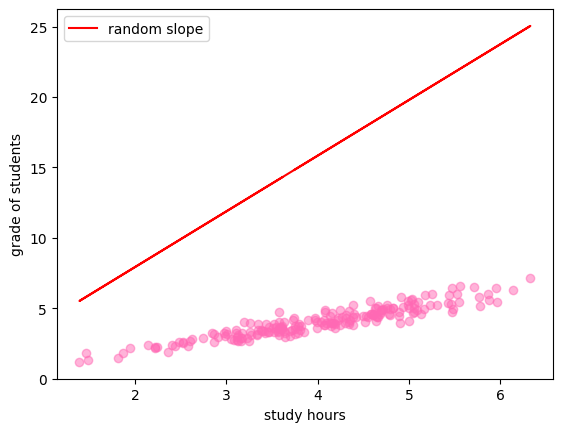

In [15]:
random_slope=np.random.uniform(0,5)
# random_slope
plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

4- Draw the correct blue line using your Object Oriented Linear Least Squares (LLS) method.

In [16]:
np.shape(X_train)
X_train=X_train.reshape(-1,1)

In [17]:
W=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
W

array([1.00260924])

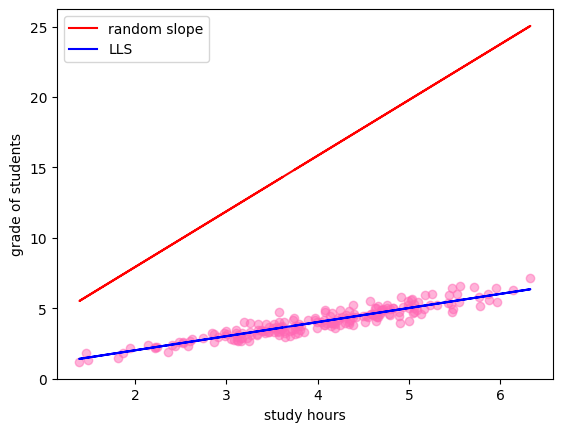

In [18]:
plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.plot(X,W*X,c="blue",label="LLS")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

5- Draw a green line using linregress from scipy library. Compare your result with scipy's result.

In [19]:
from scipy import stats

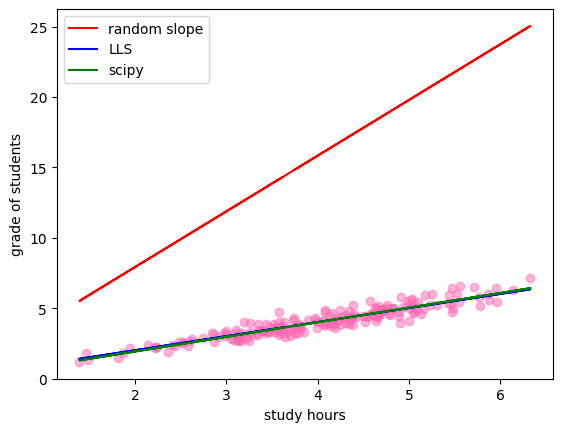

In [20]:
slope, intercept, r, p, std_err = stats.linregress(X_train.T,Y_train)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))
# mymodel

plt.scatter(X,Y,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X,c="red",label="random slope")
plt.plot(X,W*X,c="blue",label="LLS")
plt.plot(X,mymodel,c="green",label="scipy")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()
